<a href="https://colab.research.google.com/github/kasprova/advanced_customer_analytics/blob/master/notebooks/clusterization_sklearn_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CLUSTERISATION: data preprocessing (update 2019-10-26)

In [0]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline 
plt.style.use('ggplot')
#plt.style.use('default')
plt.rcParams["figure.figsize"] = (10,5)

#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#from cuml import DBSCAN as cuDBSCAN, KMeans as cuKMeans, PCA as cuPCA
from collections import Counter 

### Load Data

In [2]:
#mount google drive to get access to the data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -q "drive/My Drive/analytics/universal_features_manual_cat_201509_201608__.zip"

In [0]:
universal_features = "universal_features_manual_cat_201509_201608__.parquet"

In [0]:
#!unzip -q "drive/My Drive/grocery_store_data/universal_features_manual_cat.parquet.zip"
#universal_features = "universal_features_manual_cat.parquet"

In [10]:
data = pd.read_parquet(universal_features)
data.columns

Index(['month_id', 'household_id', 'recency', 'frequency', 'monetary', 'churn',
       'discount_number__store_coupon', 'discount_value__store_coupon',
       'discount_number__manufacture_coupon',
       'discount_value__manufacture_coupon', 'discount_number__misc_credit',
       'discount_value__misc_credit', 'discount_number__xxx_credit',
       'discount_value__xxx_credit', 'discount_number__total',
       'discount_value__total', 'deposite_number__bottle',
       'deposite_value__bottle', 'return_number__bottle',
       'return_value__bottle', 'refund_number', 'refund_value',
       'cat_m_alco_tabacco_paid_amount_pcnt',
       'cat_m_baby_and_pets_paid_amount_pcnt', 'cat_m_baking_paid_amount_pcnt',
       'cat_m_diary_paid_amount_pcnt', 'cat_m_drinks_paid_amount_pcnt',
       'cat_m_grains_paid_amount_pcnt', 'cat_m_greens_paid_amount_pcnt',
       'cat_m_misc_paid_amount_pcnt', 'cat_m_prepared_food_paid_amount_pcnt',
       'cat_m_proteins_paid_amount_pcnt', 'cat_m_sause_paid_amo

In [12]:
data.shape

(1497163, 36)

## 1. Data Preprocessing

In [0]:
#ignore_list = ['month_id', 'household_id']
#features = [c for c in data.columns if c not in ignore_list]

In [0]:
#selected features (https://colab.research.google.com/drive/1jsV0YqUgV3CtFQL4zEykRg0UPHfZ32ER#scrollTo=DG1uTQEnmYMo)
features = [
 'monetary',
 'discount_number__total',
 'cat_m_prepared_food_paid_amount_pcnt',
 'frequency',
 'recency',
 'cat_m_proteins_paid_amount_pcnt',
 'cat_m_diary_paid_amount_pcnt',
 'cat_m_sause_paid_amount_pcnt',
 'cat_m_misc_paid_amount_pcnt',
 'cat_m_greens_paid_amount_pcnt',
 'cat_m_drinks_paid_amount_pcnt',
 'discount_number__xxx_credit',
 'discount_value__total',
 'duration_since_start__months',
 'cat_m_grains_paid_amount_pcnt',
 'discount_value__xxx_credit',
 'deposite_number__bottle',
 'cat_m_baking_paid_amount_pcnt',
 'cat_m_sweets_paid_amount_pcnt',
 'deposite_value__bottle',
 'cards_number',
 'cat_m_baby_and_pets_paid_amount_pcnt',
 'cat_m_alco_tabacco_paid_amount_pcnt',
 'churn',
 'discount_value__manufacture_coupon',
 'discount_number__manufacture_coupon']

Raw data


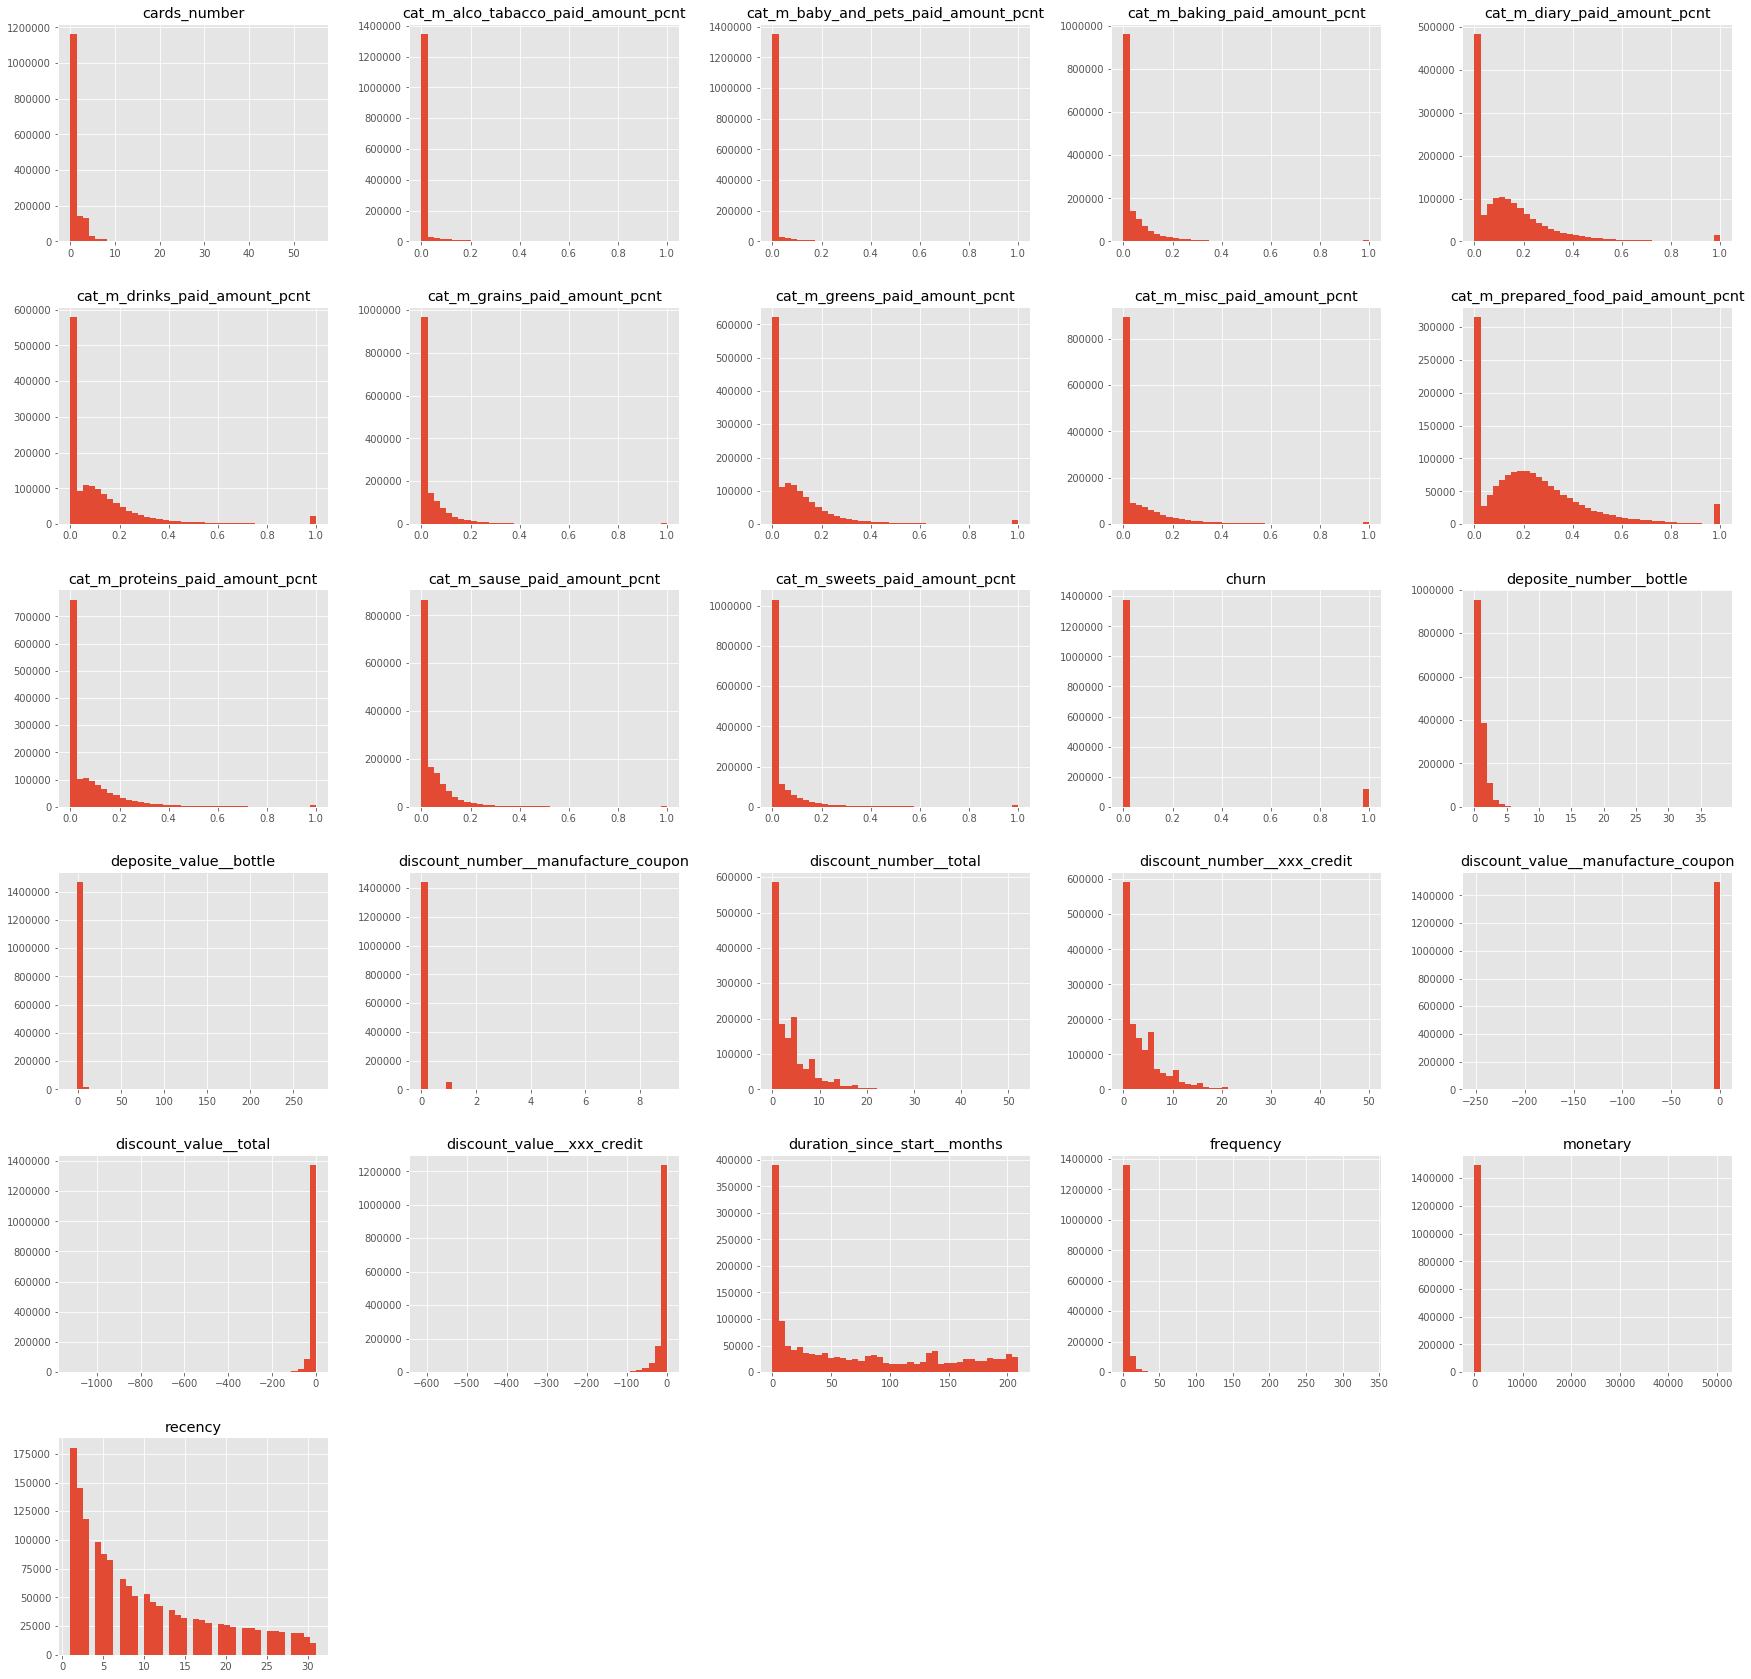

In [16]:
df = data.copy()
plt.rcParams["figure.figsize"] = (30,30)
df[features].hist(bins=40)
print("Raw data")

In [0]:
# transform from negative to positive values
df[['discount_value__manufacture_coupon',
 'discount_value__store_coupon',
 'discount_value__total',
 'refund_value',
 'return_value__bottle']] = - df[[
 'discount_value__manufacture_coupon',
 'discount_value__store_coupon',
 'discount_value__total',
 'refund_value',
 'return_value__bottle']]

#applying log(x+1) transformation for features containing 'money' value
df[['monetary']] = np.log1p(df[['monetary']])

#applying StandardScaler scaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = features

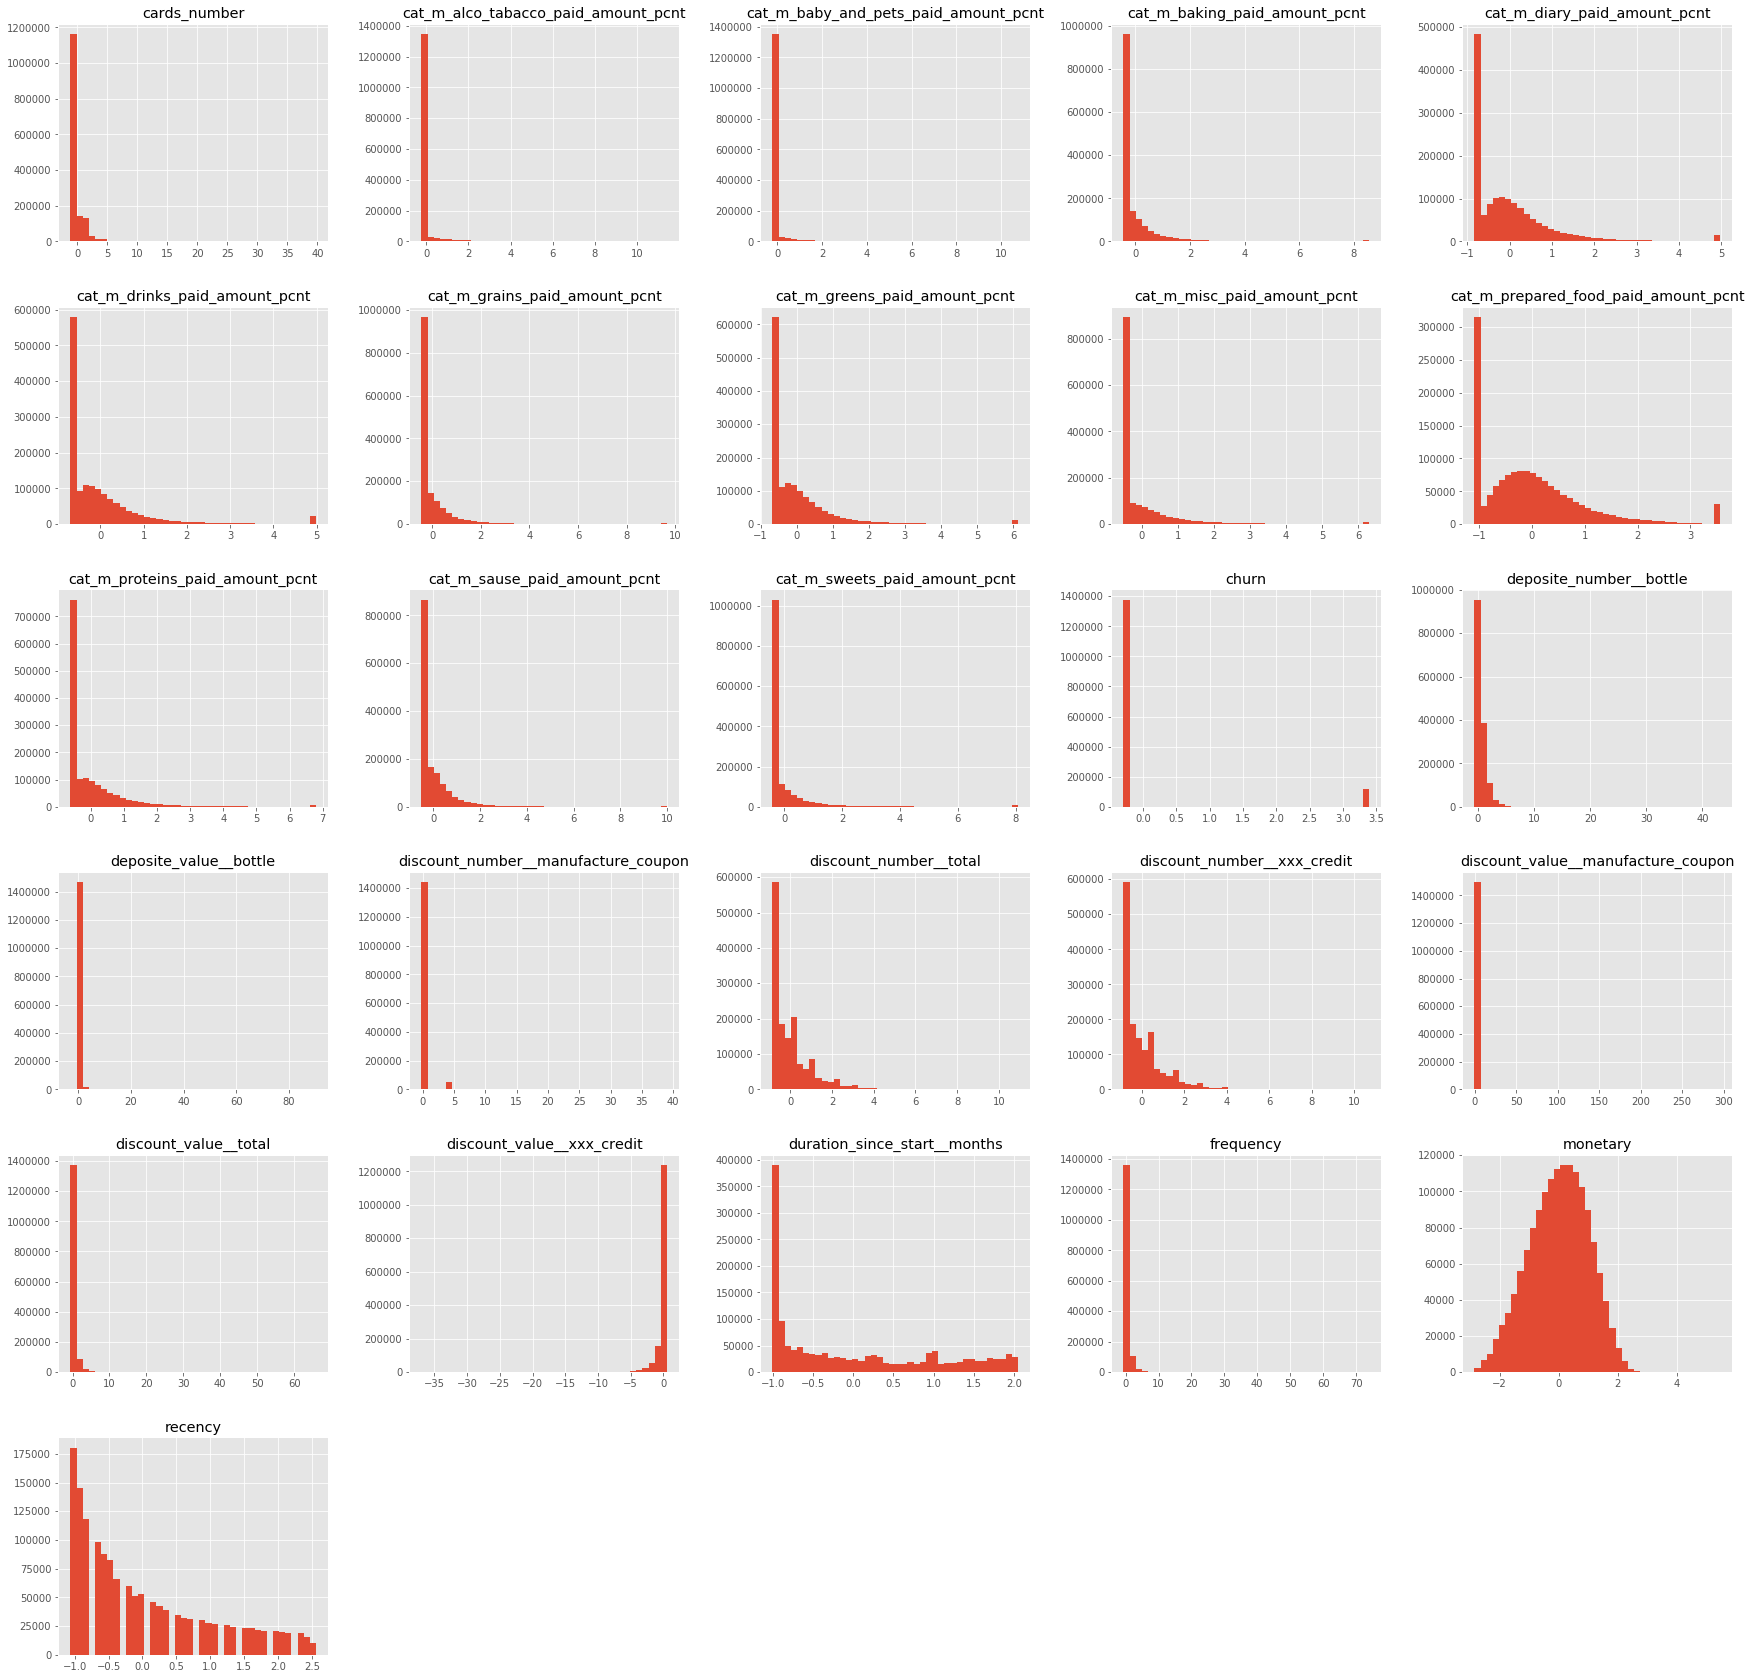

In [18]:
plt.rcParams["figure.figsize"] = (30,30)
scaled_df.hist(bins=40)
plt.show()

In [23]:
scaled_df.head()

,monetary,discount_number__total,cat_m_prepared_food_paid_amount_pcnt,frequency,recency,cat_m_proteins_paid_amount_pcnt,cat_m_diary_paid_amount_pcnt,cat_m_sause_paid_amount_pcnt,cat_m_misc_paid_amount_pcnt,cat_m_greens_paid_amount_pcnt,cat_m_drinks_paid_amount_pcnt,discount_number__xxx_credit,discount_value__total,duration_since_start__months,cat_m_grains_paid_amount_pcnt,discount_value__xxx_credit,deposite_number__bottle,cat_m_baking_paid_amount_pcnt,cat_m_sweets_paid_amount_pcnt,deposite_value__bottle,cards_number,cat_m_baby_and_pets_paid_amount_pcnt,cat_m_alco_tabacco_paid_amount_pcnt,churn,discount_value__manufacture_coupon,discount_number__manufacture_coupon
0,-0.223667,-0.182744,-0.248864,-0.224563,-0.217363,0.350803,-0.832092,0.057238,-0.506781,-0.670603,-0.691165,-0.170726,-0.217028,1.890775,2.281825,0.213751,-0.600042,2.852238,-0.400906,-0.193192,1.830801,-0.218164,-0.230427,-0.294991,-0.097615,-0.18746
1,1.368960,0.723291,1.070910,4.896430,-1.062686,-0.605681,-0.761543,-0.413246,0.528222,0.499677,0.105696,0.753483,0.749026,1.890775,0.055381,-0.782965,0.550907,-0.439471,-0.400906,0.101835,2.574347,-0.218164,-0.230427,-0.294991,-0.097615,-0.18746
2,-1.091531,-0.635762,0.439352,-0.447215,-0.579644,-0.605681,1.648611,-0.508831,-0.506781,0.987169,-0.691165,-0.632831,-0.451420,1.890775,-0.445512,0.455583,-0.600042,-0.439471,-0.400906,-0.193192,2.574347,-0.218164,-0.230427,-0.294991,-0.097615,-0.18746
3,0.383096,-0.409253,-0.056577,-0.001911,0.990241,2.010597,-0.832092,-0.014672,-0.506781,-0.162317,0.169258,-0.401779,-0.447860,1.890775,0.476447,0.451910,0.550907,0.096389,-0.400906,-0.094850,1.087255,-0.218164,-0.230427,-0.294991,-0.097615,-0.18746
4,1.658280,0.270273,-0.530436,0.888696,-0.217363,0.291883,1.010911,-0.508831,-0.304333,1.048071,-0.508685,0.291378,0.171056,1.890775,-0.063791,-0.186650,0.550907,0.035484,-0.096372,-0.176802,3.317893,-0.218164,-0.230427,-0.294991,-0.097615,-0.18746


In [21]:
#save df to file
scaled_df.to_parquet('scaled_df_kmeans_201509_201698.parquet')
#zip folder
!zip -r /content/scaled_df_kmeans_201509_201698.zip /content/scaled_df_kmeans_201509_201698.parquet
#download file to local machine
#from google.colab import files
#files.download("scaled_df_kmeans.parquet")

  adding: content/scaled_df_kmeans_201509_201698.parquet (deflated 6%)


## 2.Segmentation: K-means
Assumptions about data to apply k-means:

    1. Symmetric distribution of variables (not skewed)
    2. Variables with same average values
    3. Variables with same variance



In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter

X = scaled_df.values

kmeans = KMeans(n_clusters = 25, 
                    init = 'k-means++',
                    max_iter = 300,
                    n_init = 10,
                    random_state = 0)
kmeans.fit_predict(X)

array([ 5,  6,  5, ..., 14,  7, 17], dtype=int32)

In [0]:
final_df = df[['month_id','household_id']].reset_index().merge(pd.DataFrame(kmeans.labels_, columns = ['labels']), right_index = True, left_index = True)

In [0]:
#save df to file
final_df[['month_id', 'household_id','labels']].to_parquet('cluster_labels_191026.parquet')

--------------

In [27]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [0]:
pca = PCA(n_components=2, random_state=0)
df_pca = pca.fit_transform(X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

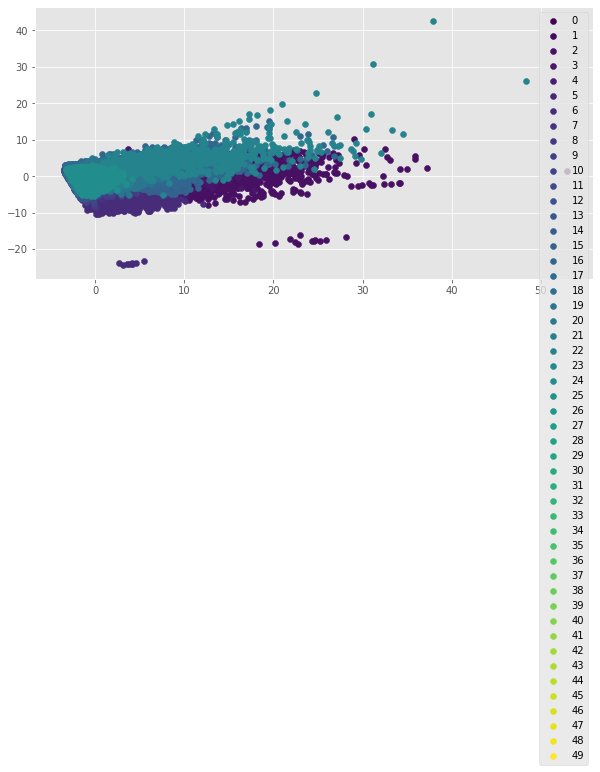

In [29]:
#plot clusters after PCA dimensionality reduction
plt.rcParams["figure.figsize"] = (10,5)
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, 50))

for cl in range(0, 50):
    plt.scatter(df_pca[kmeans.labels_==cl,0],
                    df_pca[kmeans.labels_==cl,1],
                    c=colors[cl],
                    label = cl)
plt.legend()
plt.show()

In [30]:
# print centroids coordinates
df_centr = pd.DataFrame(kmeans.cluster_centers_)
df_centr.columns = features
df_centr.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
monetary,-0.980814,-0.677930,1.831075,1.254876,-0.890317,0.220502,0.546895,-0.878364,-0.324051,-0.200512,-0.947032,-0.413514,-0.935704,-0.837556,-1.102891,1.382981,1.259399,-0.219459,0.970180,0.485159,-0.894963,0.880123,1.062482,0.329422,-0.621047
discount_number__total,-0.625874,-0.537667,3.619323,2.672329,-0.531880,-0.162490,0.477472,-0.568381,-0.441483,-0.444029,-0.573423,-0.419655,-0.624878,-0.700983,-0.564906,2.358185,0.920861,-0.465325,0.448822,0.631713,-0.665432,1.064190,2.480544,-0.284891,-0.499833
cat_m_prepared_food_paid_amount_pcnt,-0.475718,-0.722479,0.002564,0.028721,-0.530417,0.079187,0.009169,-0.608922,-0.055217,-0.685106,-0.695190,0.325639,-0.634847,-0.656118,-0.732654,0.006467,-0.035322,-0.546389,-0.053034,0.107951,2.516542,0.024053,-0.062850,0.026981,-0.482685
frequency,-0.533133,-0.458881,2.998306,1.335371,-0.439741,0.007933,0.655982,-0.465707,-0.552143,0.049142,-0.495566,-0.573473,-0.468136,-0.504883,-0.478379,1.637361,1.188429,-0.240694,0.535142,0.230389,-0.491465,0.662784,1.292316,-0.014736,-0.475553
recency,0.450209,0.341581,-0.851941,-0.712136,0.286481,-0.349020,-0.477710,0.398239,1.342885,0.069537,0.446787,0.705929,0.336078,0.398826,0.376375,-0.744686,-0.621114,0.124963,-0.497002,-0.301632,0.354278,-0.558095,-0.602666,-0.533420,0.385129
cat_m_proteins_paid_amount_pcnt,-0.409001,-0.451986,0.004289,-0.016133,-0.471687,-0.007673,0.012161,-0.408522,-0.030084,-0.430239,-0.413607,-0.023001,-0.435241,-0.446471,-0.508118,0.052440,-0.070867,-0.341299,-0.061655,-0.037305,-0.470231,0.108278,-0.110137,0.010797,3.671258
cat_m_diary_paid_amount_pcnt,-0.463475,-0.566663,-0.056885,-0.029312,-0.508570,0.109760,0.069452,-0.330282,-0.047951,-0.502187,-0.467693,-0.045315,3.287629,-0.521434,-0.600695,-0.037895,0.094091,-0.460424,-0.064967,0.024687,-0.554125,0.023674,-0.091230,0.092548,-0.408038
cat_m_sause_paid_amount_pcnt,5.374976,-0.352081,-0.008350,0.003396,-0.348676,-0.001347,-0.018793,-0.244839,0.029052,-0.349200,-0.244118,-0.020480,-0.350079,-0.307952,-0.406849,-0.001479,0.029459,-0.255684,-0.038648,0.028649,-0.344310,0.028981,-0.025185,0.076974,-0.244638
cat_m_misc_paid_amount_pcnt,-0.368883,4.164189,0.189225,0.236191,-0.366467,-0.088065,0.006815,-0.358209,-0.165104,-0.207222,-0.327629,-0.139761,-0.408611,-0.396368,-0.382902,0.105276,0.111190,-0.251794,0.112563,0.159263,-0.410573,0.027945,0.453817,-0.034985,-0.365914
cat_m_greens_paid_amount_pcnt,-0.228086,-0.447025,-0.076451,-0.055214,-0.439009,0.077081,-0.004235,-0.303357,-0.021986,-0.455536,-0.311037,-0.052253,-0.396004,4.133091,-0.498876,-0.070020,0.055812,-0.366567,-0.064992,-0.007590,-0.438065,-0.024825,-0.186992,0.097770,-0.297563


In [31]:
kmeans.labels_.shape

(1497163,)

In [0]:
#cu_X = cudf.from_pandas(scaled_df)
#clusters_WCSS = {}
#WCSS={}
#kmeans_cuml = cumlKMeans(n_clusters=50)
#kmeans_cuml.fit(cu_X)

### References:
  https://github.com/rapidsai/notebooks-contrib/blob/master/getting_started_notebooks/intro_tutorials/02_Introduction_to_cuDF.ipynb
  
  rapid setup on colab https://colab.research.google.com/drive/1OqZFKkkyVthnB-Qz-ukb61CM4yKzke_Y#scrollTo=3Uk49SIW5Esf https://medium.com/@kayush206/rapids-on-google-colab-d11df50abcf3 
  
  rapid samples https://github.com/rapidsai/notebooks
  
  markov model explained on DataCamp blog https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial
  
  